In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
# Loading the dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
energy_data = pd.read_excel(url)

# Displaying the first five rows
energy_data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
# Checking the shape of the dataset
print("Dataset shape:", energy_data.shape)

# Checking for missing values
print("\nMissing values:\n", energy_data.isnull().sum())

# Data types and information
energy_data.info()


Dataset shape: (768, 10)

Missing values:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
# Renaming columns for better understanding
energy_data.columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area',
    'Roof_Area', 'Overall_Height', 'Orientation',
    'Glazing_Area', 'Glazing_Area_Distribution',
    'Heating_Load', 'Cooling_Load'
]
# Statistical summary of the dataset
energy_data.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


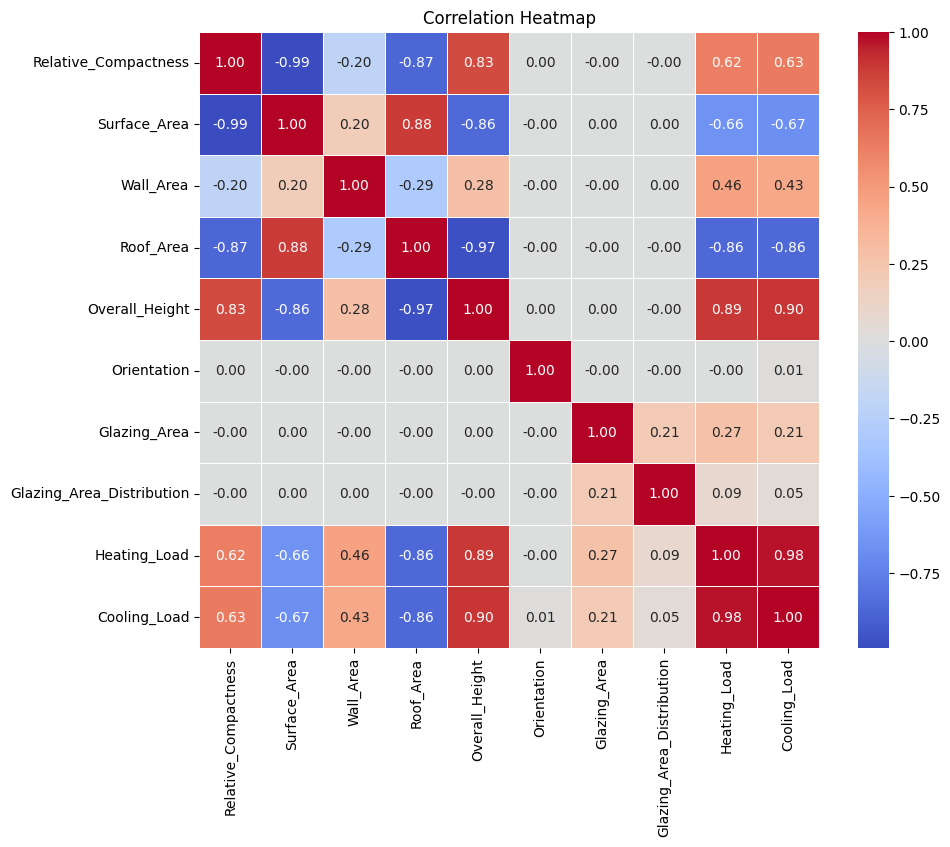

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = energy_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",
            fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


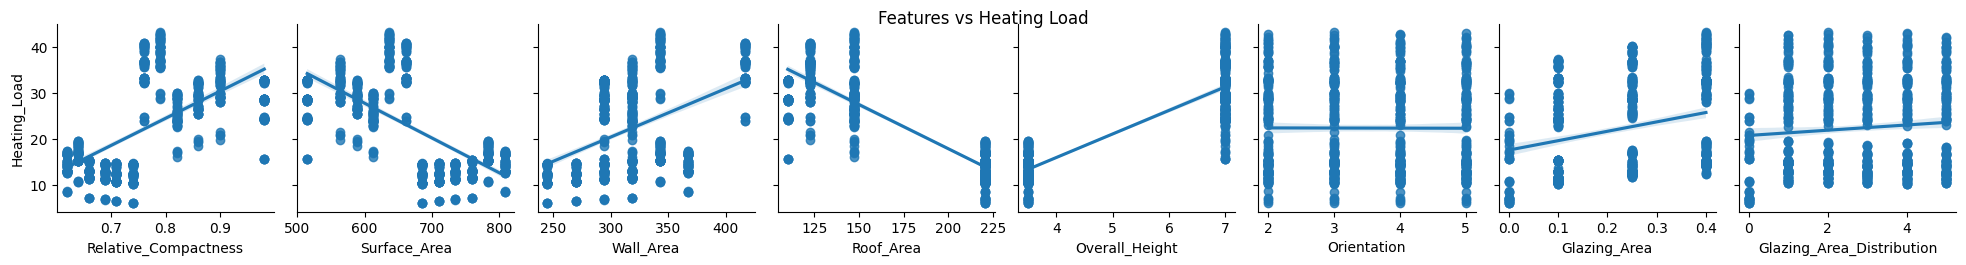

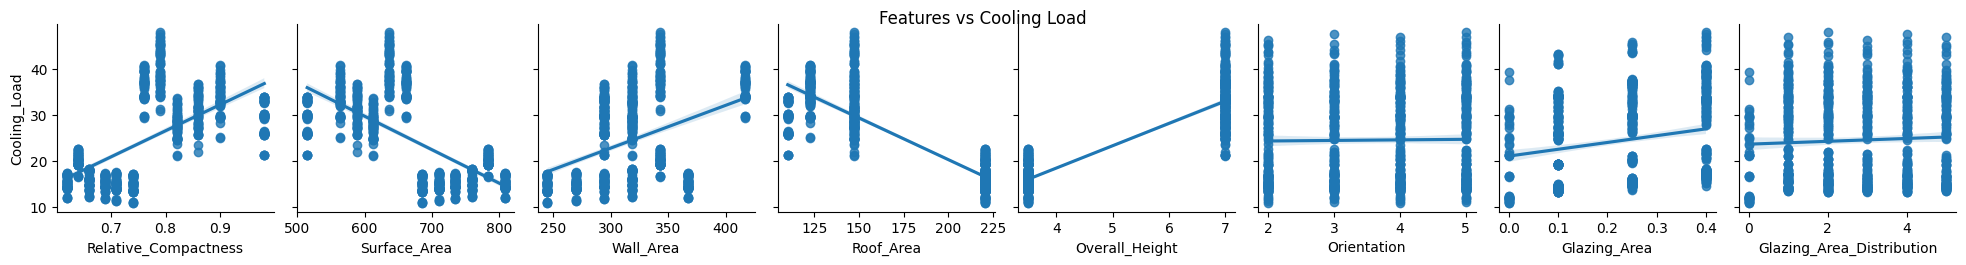

In [ ]:
# Pairplot for Heating Load
sns.pairplot(energy_data,
             x_vars=energy_data.columns[:-2],
             y_vars='Heating_Load', kind='reg')
plt.suptitle('Features vs Heating Load', y=1.02)
plt.show()

# Pairplot for Cooling Load
sns.pairplot(energy_data,
             x_vars=energy_data.columns[:-2],
             y_vars='Cooling_Load', kind='reg')
plt.suptitle('Features vs Cooling Load', y=1.02)
plt.show()


# **DATA PREPROCESSING**

In [ ]:
# Features and targets
X = energy_data.iloc[:, :-2]
Y1 = energy_data['Heating_Load']
Y2 = energy_data['Cooling_Load']

# Splitting data for Y1 (Heating Load)
X_train, X_test, Y1_train, Y1_test = train_test_split(
    X, Y1, test_size=0.2, random_state=42)

# Splitting data for Y2 (Cooling Load)
_, _, Y2_train, Y2_test = train_test_split(
    X, Y2, test_size=0.2, random_state=42)


In [ ]:
# Scaling features for linear models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **MODELLING**

In [ ]:
# Linear Regression for Heating Load
linear_model_Y1 = LinearRegression()
linear_model_Y1.fit(X_train_scaled, Y1_train)
Y1_pred_linear = linear_model_Y1.predict(X_test_scaled)

# Linear Regression for Cooling Load
linear_model_Y2 = LinearRegression()
linear_model_Y2.fit(X_train_scaled, Y2_train)
Y2_pred_linear = linear_model_Y2.predict(X_test_scaled)


In [ ]:
# Ridge Regression for Heating Load
ridge_model_Y1 = Ridge()
ridge_model_Y1.fit(X_train_scaled, Y1_train)
Y1_pred_ridge = ridge_model_Y1.predict(X_test_scaled)

# Ridge Regression for Cooling Load
ridge_model_Y2 = Ridge()
ridge_model_Y2.fit(X_train_scaled, Y2_train)
Y2_pred_ridge = ridge_model_Y2.predict(X_test_scaled)


In [ ]:
# Lasso Regression for Heating Load
lasso_model_Y1 = Lasso()
lasso_model_Y1.fit(X_train_scaled, Y1_train)
Y1_pred_lasso = lasso_model_Y1.predict(X_test_scaled)

# Lasso Regression for Cooling Load
lasso_model_Y2 = Lasso()
lasso_model_Y2.fit(X_train_scaled, Y2_train)
Y2_pred_lasso = lasso_model_Y2.predict(X_test_scaled)


In [ ]:
# Random Forest for Heating Load
rf_model_Y1 = RandomForestRegressor(n_estimators=100,
                                    random_state=42)
rf_model_Y1.fit(X_train, Y1_train)
Y1_pred_rf = rf_model_Y1.predict(X_test)

# Random Forest for Cooling Load
rf_model_Y2 = RandomForestRegressor(n_estimators=100,
                                    random_state=42)
rf_model_Y2.fit(X_train, Y2_train)
Y2_pred_rf = rf_model_Y2.predict(X_test)


In [ ]:
# Gradient Boosting for Heating Load
gb_model_Y1 = GradientBoostingRegressor(n_estimators=100,
                                        random_state=42)
gb_model_Y1.fit(X_train, Y1_train)
Y1_pred_gb = gb_model_Y1.predict(X_test)

# Gradient Boosting for Cooling Load
gb_model_Y2 = GradientBoostingRegressor(n_estimators=100,
                                        random_state=42)
gb_model_Y2.fit(X_train, Y2_train)
Y2_pred_gb = gb_model_Y2.predict(X_test)


## **MODEL EVALUATION**

In [ ]:
def evaluate_model(true_values, predictions):
    rmse = np.sqrt(mean_squared_error(true_values,
                                      predictions))
    mae = mean_absolute_error(true_values, predictions)
    return rmse, mae


In [ ]:
# Storing results
results_Y1 = pd.DataFrame(columns=['Model', 'RMSE', 'MAE'])

# Linear Regression
rmse, mae = evaluate_model(Y1_test, Y1_pred_linear)
#results_Y1 = results_Y1.append({'Model': 'Linear Regression','RMSE': rmse, 'MAE': mae}, ignore_index=True)
results_Y1 = pd.concat([results_Y1, pd.DataFrame([{'Model': 'Linear Regression','RMSE': rmse, 'MAE': mae}])], ignore_index=True)

# Ridge Regression
rmse, mae = evaluate_model(Y1_test, Y1_pred_ridge)
results_Y1 = pd.concat([results_Y1, pd.DataFrame([{'Model': 'Ridge Regression','RMSE': rmse, 'MAE': mae}])], ignore_index=True)

# Lasso Regression
rmse, mae = evaluate_model(Y1_test, Y1_pred_lasso)
results_Y1 = pd.concat([results_Y1, pd.DataFrame ([{'Model': 'Lasso Regression','RMSE': rmse, 'MAE': mae}])],ignore_index=True)

# Random Forest
rmse, mae = evaluate_model(Y1_test, Y1_pred_rf)
results_Y1 = pd.concat([results_Y1, pd.DataFrame([{'Model': 'Random Forest','RMSE': rmse, 'MAE': mae}])],ignore_index=True)

# Gradient Boosting
rmse, mae = evaluate_model(Y1_test, Y1_pred_gb)
results_Y1 = pd.concat([results_Y1, pd.DataFrame([{'Model': 'Gradient Boosting','RMSE': rmse, 'MAE': mae}])],ignore_index=True)

# Displaying the results
print("Model Performance for Heating Load (Y1):")
print(results_Y1)


Model Performance for Heating Load (Y1):
               Model      RMSE       MAE
0  Linear Regression  3.064463  2.195277
1   Ridge Regression  3.035431  2.190779
2   Lasso Regression  3.524808  2.549161
3      Random Forest  0.490798  0.354674
4  Gradient Boosting  0.515083  0.386133


<ipython-input-24-3d30e8079bb8>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_Y1 = pd.concat([results_Y1, pd.DataFrame([{'Model': 'Linear Regression','RMSE': rmse, 'MAE': mae}])], ignore_index=True)


In [ ]:
# Storing results
results_Y2 = pd.DataFrame(columns=['Model', 'RMSE', 'MAE'])

# Linear Regression
rmse, mae = evaluate_model(Y2_test, Y2_pred_linear)
results_Y2 = pd.concat([results_Y2, pd.DataFrame([{'Model': 'Linear Regression',
                                'RMSE': rmse, 'MAE': mae}])],
                               ignore_index=True)

# Ridge Regression
rmse, mae = evaluate_model(Y2_test, Y2_pred_ridge)
results_Y2 = pd.concat([results_Y2, pd.DataFrame([{'Model': 'Ridge Regression',
                                'RMSE': rmse, 'MAE': mae}])],
                               ignore_index=True)

# Lasso Regression
rmse, mae = evaluate_model(Y2_test, Y2_pred_lasso)
results_Y2 = pd.concat([results_Y2, pd.DataFrame([{'Model': 'Lasso Regression',
                                'RMSE': rmse, 'MAE': mae}])],
                               ignore_index=True)

# Random Forest
rmse, mae = evaluate_model(Y2_test, Y2_pred_rf)
results_Y2 = pd.concat([results_Y2, pd.DataFrame([{'Model': 'Random Forest',
                                'RMSE': rmse, 'MAE': mae}])],
                               ignore_index=True)

# Gradient Boosting
rmse, mae = evaluate_model(Y2_test, Y2_pred_gb)
results_Y2 = pd.concat([results_Y2, pd.DataFrame([{'Model': 'Gradient Boosting',
                                'RMSE': rmse, 'MAE': mae}])],
                               ignore_index=True)

# Displaying the results
print("Model Performance for Cooling Load (Y2):")
print(results_Y2)


Model Performance for Cooling Load (Y2):
               Model      RMSE       MAE
0  Linear Regression  3.200901  2.246619
1   Ridge Regression  3.152329  2.195886
2   Lasso Regression  3.708422  2.753019
3      Random Forest  1.712920  1.060435
4  Gradient Boosting  1.513218  1.055409


<ipython-input-27-9c509c7d0dbf>:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_Y2 = pd.concat([results_Y2, pd.DataFrame([{'Model': 'Linear Regression',
